## Import Libraries
This section performs a specific step in the SMS spam classification pipeline.


In [1]:
# Import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

## Load Dataset
This section performs a specific step in the SMS spam classification pipeline.


In [2]:
# This code block executes the step described above
df = pd.read_csv("spam.csv", encoding="latin-1")

## Data Cleaning & Preprocessing
This section performs a specific step in the SMS spam classification pipeline.


In [3]:
# This code block executes the step described above
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

## Feature Extraction (TF-IDF)
This section performs a specific step in the SMS spam classification pipeline.


In [4]:
# This code block executes the step described above
df.head()
    

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Train-Test Split
This section performs a specific step in the SMS spam classification pipeline.


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Check for empty messages 
df.dropna(inplace=True)

# See how many messages are left
print("Messages left:", len(df))
print(df['label'].value_counts())

Messages left: 5169
label
ham     4516
spam     653
Name: count, dtype: int64


## Model Training
This section performs a specific step in the SMS spam classification pipeline.


In [6]:
# Changing labels to numbers Ham = 0, Spam = 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Showing first 5 rows to check if the data is correct
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Model Evaluation
This section performs a specific step in the SMS spam classification pipeline.


In [7]:
# This code block executes the step described above
import string
def clean_text(text):
    # Making everything lowercase 
    text = text.lower()
    # Removing punctuation (dots, commas, !)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
# Running this clean data 
df['clean_message'] = df['message'].apply(clean_text)
# Checking the result
df[['message', 'clean_message']].head()

,message,clean_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


## Results & Visualization
This section performs a specific step in the SMS spam classification pipeline.


In [ ]:

# Split the data: X is the message, y is the label (0 or 1)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'],
    df['label_num'],
    test_size=0.2, # 20% for testing
    random_state=42
)

# Turn words into number scores (TF-IDF)
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)
print("Data is ready for training!")

Data is ready for training!


In [ ]:

# Naive Bayes 
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train) # Teaching Naive Bayes
y_pred_nb = nb_model.predict(X_test_vec) # Testing Naive Bayes

# Logistic Regression 
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_vec, y_train) # Teaching Logistic Regresion
y_pred_lr = lr_model.predict(X_test_vec) # Testing Logistic Regression

print("Finished Learning")

Finished Learning


Naive Bayes Score
Accuracy: 0.9642166344294004
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.92      1034
weighted avg       0.97      0.96      0.96      1034


Logistic Regression Score
Accuracy: 0.9584139264990329
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.72      0.83       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



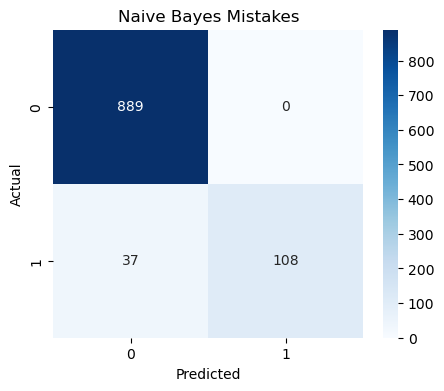

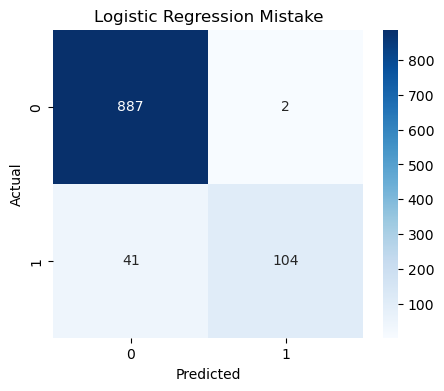

In [ ]:

# Checking Naive Bayes
print("Naive Bayes Score")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# Checking Logistic Regression
print("\nLogistic Regression Score")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

#  Heatmap for Naive Bayes
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Mistakes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#  Heatmap for Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Mistake')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:

#Tuning: Naive Bayes
#Using different 'alpha' values.
# 0.1 is very sharp, 10.0 is very smooth.
nb_params = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}

# Run the GridSearch
nb_grid = GridSearchCV(MultinomialNB(), nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train_vec, y_train)

print("Best settings for Naive Bayes:", nb_grid.best_params_)
best_nb_model = nb_grid.best_estimator_ 


#Tuning: Logistic Regression
#Different 'C' values.
# 0.1 to 100 being strict.
lr_params = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}


lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_vec, y_train)

print("Best settings for Logistic Regression:", lr_grid.best_params_)
best_lr_model = lr_grid.best_estimator_ 

Best settings for Naive Bayes: {'alpha': 0.1}
Best settings for Logistic Regression: {'C': 100, 'solver': 'liblinear'}


Naive Bayes Accuracy:0.9758 
Logistic Regression Accuracy: 0.9797 

Logistic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.87      0.92       145

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034



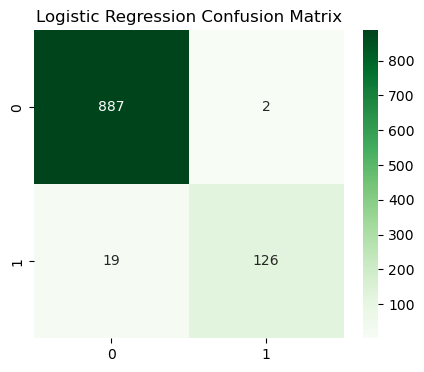

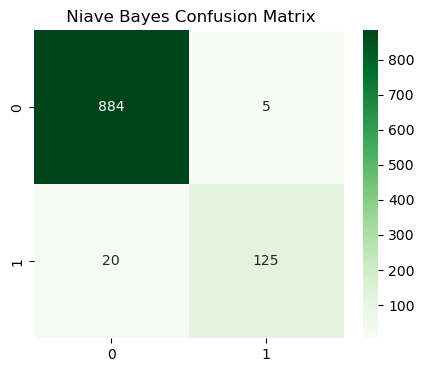

In [12]:
# Predict using the BEST models
y_pred_nb_final = best_nb_model.predict(X_test_vec)
y_pred_lr_final = best_lr_model.predict(X_test_vec)

# Calculate Final Scores
acc_nb = accuracy_score(y_test, y_pred_nb_final)
acc_lr = accuracy_score(y_test, y_pred_lr_final)


print(f"Naive Bayes Accuracy:{acc_nb:.4f} ")
print(f"Logistic Regression Accuracy: {acc_lr:.4f} ")

if acc_nb > acc_lr:
    print("\nNaive Bayes!")
else:
    print("\nLogistic Regression")

# Detailed Report Change the variable if needed

if acc_nb > acc_lr:
    print(classification_report(y_test, y_pred_nb_final))
    
    # Plot final confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred_nb_final), annot=True, fmt='d', cmap='Blues')
    plt.title('Naive Bayes Confusion Matrix')
    plt.show()
else:
    print(classification_report(y_test, y_pred_lr_final))
    
    # Plot final confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred_lr_final), annot=True, fmt='d', cmap='Greens')
    plt.title('Logistic Regression Confusion Matrix')
    plt.show()
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred_nb_final), annot=True, fmt='d', cmap='Greens')
    plt.title(' Niave Bayes Confusion Matrix')
    plt.show()

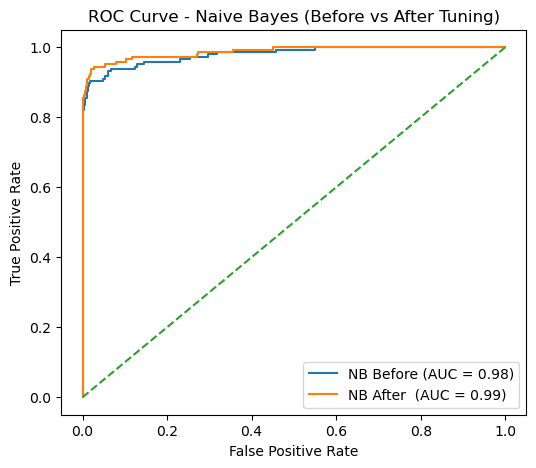

In [13]:
# Probabilities
y_prob_nb_before = nb_model.predict_proba(X_test_vec)[:, 1]
y_prob_nb_after  = best_nb_model.predict_proba(X_test_vec)[:, 1]

# ROC
fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_nb_before)
fpr_a, tpr_a, _ = roc_curve(y_test, y_prob_nb_after)

auc_b = auc(fpr_b, tpr_b)
auc_a = auc(fpr_a, tpr_a)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr_b, tpr_b, label='NB Before (AUC = %.2f)' % auc_b)
plt.plot(fpr_a, tpr_a, label='NB After  (AUC = %.2f)' % auc_a)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (Before vs After Tuning)')
plt.legend()
plt.show()


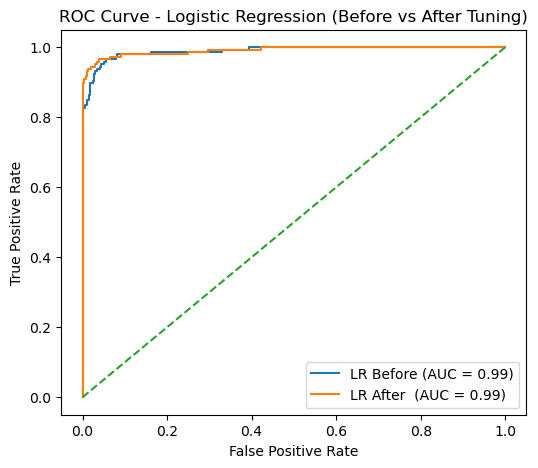

In [ ]:
y_prob_lr_before = lr_model.predict_proba(X_test_vec)[:, 1]
y_prob_lr_after  = best_lr_model.predict_proba(X_test_vec)[:, 1]

fpr_b, tpr_b, _ = roc_curve(y_test, y_prob_lr_before)
fpr_a, tpr_a, _ = roc_curve(y_test, y_prob_lr_after)

auc_b = auc(fpr_b, tpr_b)
auc_a = auc(fpr_a, tpr_a)

plt.figure(figsize=(6,5))
plt.plot(fpr_b, tpr_b, label='LR Before (AUC = %.2f)' % auc_b)
plt.plot(fpr_a, tpr_a, label='LR After  (AUC = %.2f)' % auc_a)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Before vs After Tuning)')
plt.legend()
plt.show()


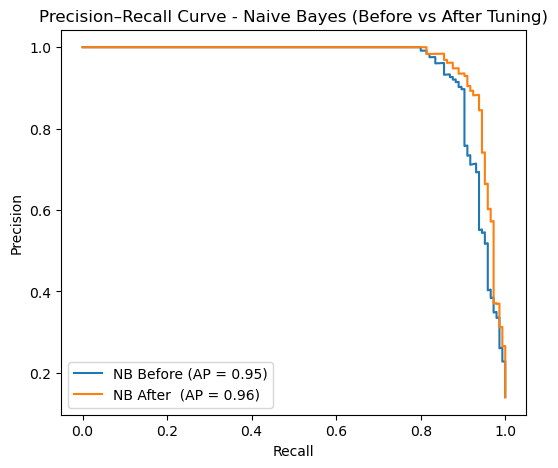

In [ ]:
y_prob_nb_before = nb_model.predict_proba(X_test_vec)[:, 1]
y_prob_nb_after  = best_nb_model.predict_proba(X_test_vec)[:, 1]

prec_b, rec_b, _ = precision_recall_curve(y_test, y_prob_nb_before)
prec_a, rec_a, _ = precision_recall_curve(y_test, y_prob_nb_after)

ap_b = average_precision_score(y_test, y_prob_nb_before)
ap_a = average_precision_score(y_test, y_prob_nb_after)

plt.figure(figsize=(6,5))
plt.plot(rec_b, prec_b, label='NB Before (AP = %.2f)' % ap_b)
plt.plot(rec_a, prec_a, label='NB After  (AP = %.2f)' % ap_a)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve - Naive Bayes (Before vs After Tuning)')
plt.legend()
plt.show()

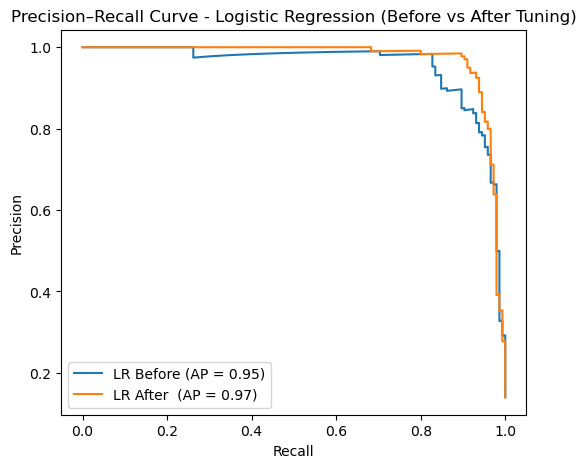

In [ ]:
# Get probability scores from Logistic Regression model before tuning
y_prob_lr_before = lr_model.predict_proba(X_test_vec)[:, 1]

# Get probability scores from Logistic Regression model after tuning
y_prob_lr_after  = best_lr_model.predict_proba(X_test_vec)[:, 1]

# Calculate precision and recall values before tuning
prec_b, rec_b, _ = precision_recall_curve(y_test, y_prob_lr_before)

# Calculate precision and recall values after tuning
prec_a, rec_a, _ = precision_recall_curve(y_test, y_prob_lr_after)

# Calculate Average Precision score before tuning
ap_b = average_precision_score(y_test, y_prob_lr_before)

# Calculate Average Precision score after tuning
ap_a = average_precision_score(y_test, y_prob_lr_after)

# Create the Precision–Recall curve plot
plt.figure(figsize=(6,5))

# Plot Precision–Recall curve for model before tuning
plt.plot(rec_b, prec_b, label='LR Before (AP = %.2f)' % ap_b)

plt.plot(rec_a, prec_a, label='LR After  (AP = %.2f)' % ap_a)

# Label x-axis as Recall
plt.xlabel('Recall')

plt.ylabel('Precision')

# Set plot title
plt.title('Precision–Recall Curve - Logistic Regression (Before vs After Tuning)')
plt.legend()

# Display the plot
plt.show()


IMPROVEMENT TABLE
                 Model  Before Tuning  After Tuning  Improvement
0          Naive Bayes       0.964217      0.975822     0.011605
1  Logistic Regression       0.958414      0.979691     0.021277


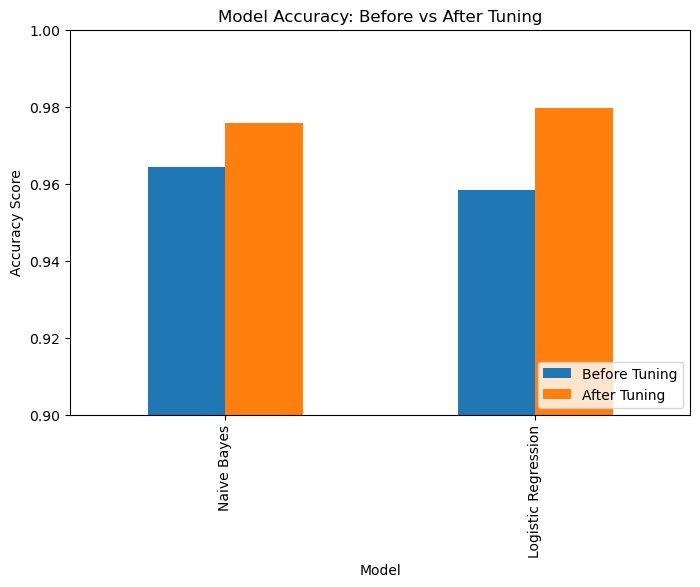

In [ ]:
#Get the scores again 
# Before Tuning
acc_nb_before = accuracy_score(y_test, y_pred_nb)
acc_lr_before = accuracy_score(y_test, y_pred_lr)

# After Tuning
acc_nb_after = accuracy_score(y_test, y_pred_nb_final)
acc_lr_after = accuracy_score(y_test, y_pred_lr_final)

#Making the table
comparison_data = {
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Before Tuning': [acc_nb_before, acc_lr_before],
    'After Tuning': [acc_nb_after, acc_lr_after],
    'Improvement': [acc_nb_after - acc_nb_before, acc_lr_after - acc_lr_before]
}

results_df = pd.DataFrame(comparison_data)


print("IMPROVEMENT TABLE")
print(results_df)

# Draw a bar chart to show difference between tuning and after tuning
results_df.set_index('Model')[['Before Tuning', 'After Tuning']].plot(kind='bar', figsize=(8,5))
plt.title("Model Accuracy: Before vs After Tuning")
plt.ylabel("Accuracy Score")
plt.ylim(0.9, 1.0) 
plt.legend(loc='lower right')
plt.show()

In [ ]:
my_messages = [
    "URGENT! You have won a free iPhone. Call 0800 now to claim!", #  Spam
    "Hey man, are we still going for lunch today?",               #  Ham
    "Free entry to the concert. Text JOIN to 12345.",             #  Spam
    "I need you to call me back right now."                       #  Ham 
]

# 2. Clean and Vectorize them 
# Same 'clean_text' function and 'tfidf' tool from before
my_messages_cleaned = [clean_text(msg) for msg in my_messages]
my_messages_vec = tfidf.transform(my_messages_cleaned)


# 0 = Ham, 1 = Spam
preds_data = {
    'Message': my_messages,
    'NB (Before)': nb_model.predict(my_messages_vec),
    'LR (Before)': lr_model.predict(my_messages_vec),
    'NB (Tuned)': best_nb_model.predict(my_messages_vec),
    'LR (Tuned)': best_lr_model.predict(my_messages_vec)
}

# Show the Results Table
pred_df = pd.DataFrame(preds_data)
#Converting Spam and Ham
pred_df.replace({0: 'Ham', 1: 'Spam'}, inplace=True)

print("                                 PREDICTING MESSAGES")
display(pred_df) 

                                 PREDICTING MESSAGES


,Message,NB (Before),LR (Before),NB (Tuned),LR (Tuned)
0,URGENT! You have won a free iPhone. Call 0800 ...,Spam,Spam,Spam,Spam
1,"Hey man, are we still going for lunch today?",Ham,Ham,Ham,Ham
2,Free entry to the concert. Text JOIN to 12345.,Spam,Spam,Spam,Spam
3,I need you to call me back right now.,Ham,Ham,Ham,Ham


In [ ]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


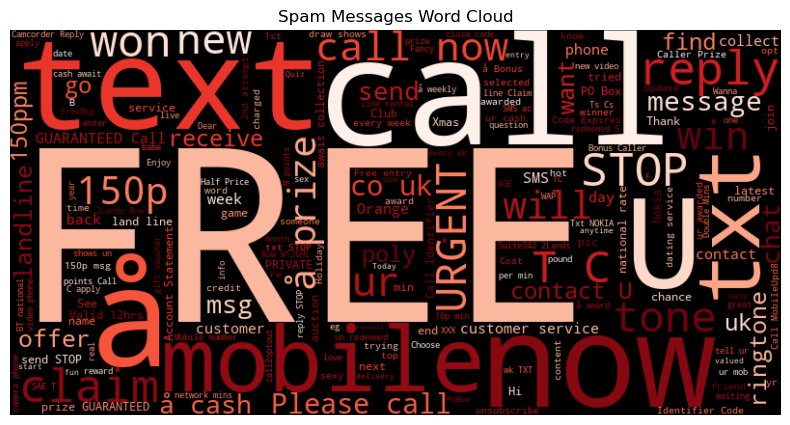

In [ ]:

np.asarray = lambda a, *args, **kwargs: np.array(a)

df['message'] = df['message'].fillna("").astype(str)

spam_text = " ".join(df[df['label'] == 'spam']['message'])

spam_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=200,
    colormap='Reds'
).generate(spam_text)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title("Spam Messages Word Cloud")
plt.axis("off")
plt.show()


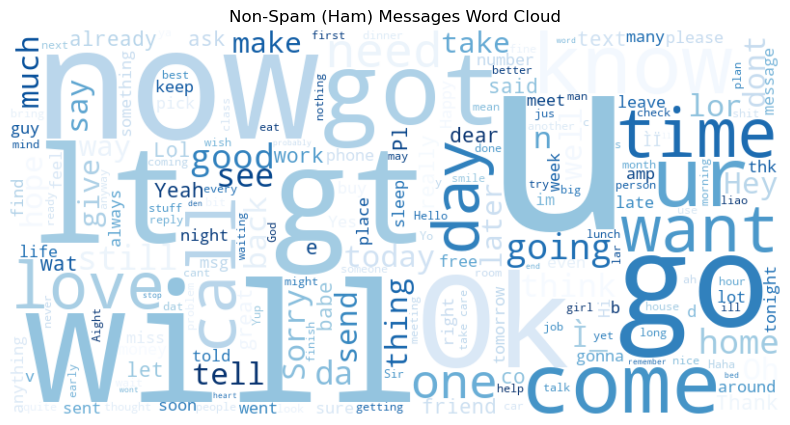

In [ ]:

np.asarray = lambda a, *args, **kwargs: np.array(a)


ham_text = " ".join(df[df['label'] == 'ham']['message'])

ham_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    colormap='Blues'
).generate(ham_text)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title("Non-Spam (Ham) Messages Word Cloud")
plt.axis("off")
plt.show()
